In [19]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats


In [3]:
# carregando dados
df = pd.read_csv('../data/housing.csv', sep=',', encoding='utf-8')

In [4]:
# head
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
# variaveis
x = df.iloc[:,1:2].values # preditora com melhores metricas na regressao simples
y = df.iloc[:,3].values

In [7]:
# modelo
regressao = smf.ols('y ~ x', data=df).fit()

In [8]:
# residuos para avaliaçao do modelo
residuos = regressao.resid

In [10]:
# teste de normalidade dos residuos
_, p = stats.shapiro(residuos)
print(p) # <0.05 não normal

9.782326333115975e-16


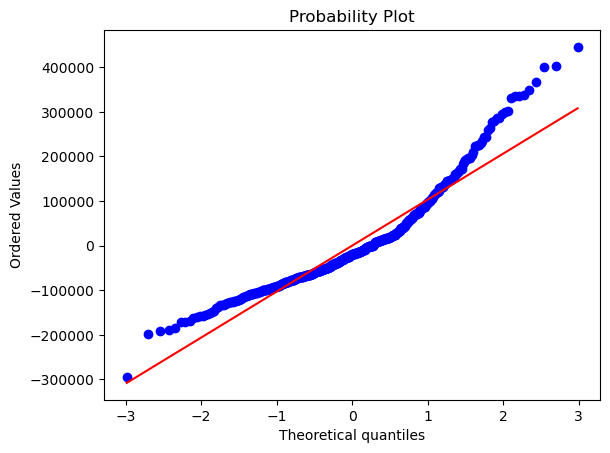

In [12]:
# plot de normalidade dos residuos
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

In [20]:
# analise estatistica de homocedasticidade ou heterocedasticidade
"""
H0 = existe homocedasticidade: p > 0.05
Ha = não existe homocedasticidade: p <= 0.05
"""
estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(p)

0.020339089399131132


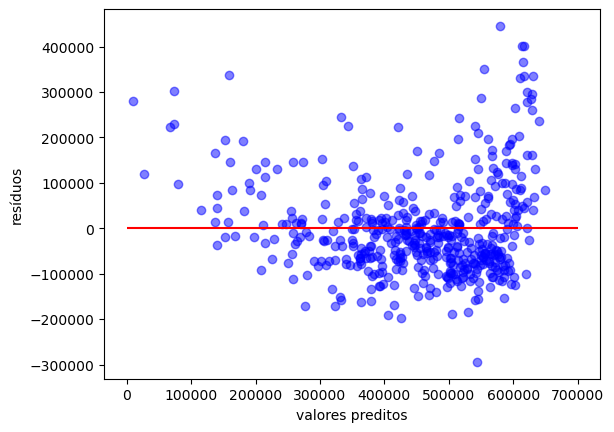

In [18]:
# plot da analise de homocedasticidade dos residuos
plt.scatter(y=residuos,x=regressao.predict(), color='blue',alpha=0.5)
plt.hlines(y=0,xmin=0, xmax=700000, color='red')
plt.ylabel('resíduos')
plt.xlabel('valores preditos')
plt.show()

In [21]:
# outliers nos residuos (entre -3 e 3)
outliers = regressao.outlier_test()

In [22]:
# max
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [23]:
# min
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

In [24]:
# summary do modelo
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.93e-93
Time:                        08:23:15   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

/tmp/ipykernel_1456051/2064541555.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color='r')


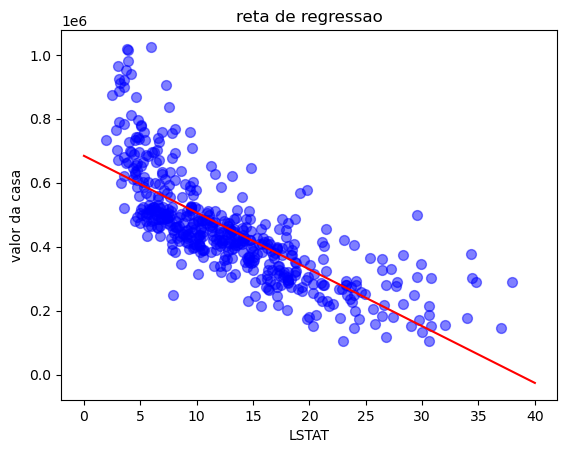

In [26]:
# plot do modelo
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=50, alpha=0.5)
x_plot = np.linspace(0,40)
plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('reta de regressao')
plt.ylabel('valor da casa')
plt.xlabel('LSTAT')
plt.show()